In [1]:
import warnings
import requests
from datetime import datetime
from tqdm import tqdm
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
# warning 메시지 출력 안함
warnings.filterwarnings('ignore')

In [3]:
# 최신 회차 크롤링 함수
def get_max_count():
    url = 'https://dhlottery.co.kr/common.do?method=main'
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')
    max_count = int(soup.find('strong', id='lottoDrwNo').text)
    return max_count

In [8]:
# 로또 당첨번호 정보 조회 함수
def crawling_lotto(count):
    # url에 회차를 실어 페이지 조회
    url = f'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={count}'
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')

    date = datetime.strptime(soup.find('p', class_='desc').text, '(%Y년 %m월 %d일 추첨)')
    win_number = [int(i) for i in soup.find('div', class_='num win').find('p').text.strip().split('\n')]
    bonus_number = int(soup.find('div', class_='num bonus').find('p').text.strip())

    return {
        'date' : date,
        'win_number' : win_number,
        'bonus_number' : bonus_number
    }

In [9]:
# 최신 회차 가져오기
max_count = get_max_count()

# 전체 회차 크롤링
data_list = []
for i in tqdm(range(1, max_count + 1)):
    result = crawling_lotto(i)
    data_list.append({
        'date' : result['date'],
        'num1' : result['win_number'][0],
        'num2' : result['win_number'][1],
        'num3' : result['win_number'][2],
        'num4' : result['win_number'][3],
        'num5' : result['win_number'][4],
        'num6' : result['win_number'][5],
        'bonus' : result['bonus_number']
    })
# 데이터를 데이터프레임으로 변환
data = pd.DataFrame(data_list)
data

100%|██████████| 1124/1124 [04:51<00:00,  3.85it/s]


,date,num1,num2,num3,num4,num5,num6,bonus
0,2002-12-07,10,23,29,33,37,40,16
1,2002-12-14,9,13,21,25,32,42,2
2,2002-12-21,11,16,19,21,27,31,30
3,2002-12-28,14,27,30,31,40,42,2
4,2003-01-04,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...
1119,2024-05-18,2,19,26,31,38,41,34
1120,2024-05-25,6,24,31,32,38,44,8
1121,2024-06-01,3,6,21,30,34,35,22
1122,2024-06-08,13,19,21,24,34,35,26


In [11]:
# 크롤링한 로또번호를 csv파일로 저장
csv_filename = 'lotto_result.csv'
data.to_csv(csv_filename, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 '{csv_filename}' 이름으로 저장되었습니다.")

CSV 파일이 'lotto_result.csv' 이름으로 저장되었습니다.


In [2]:
# 저장한 csv파일 불러오기
csv_filename = 'lotto_result.csv'
lotto_data = pd.read_csv(csv_filename, encoding='utf-8-sig')

In [25]:
# 로또 번호를 한 리스트에 모으기
numbers = []
columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']

for column in columns:
    for number in lotto_data[column]:
        numbers.append(number)

In [23]:
# 필요 패키지 import
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

In [40]:
#numbers

In [27]:
# 숫자의 빈도 계산
number_counts = Counter(numbers)

In [34]:
number_counts

Counter({34: 172,
         18: 165,
         12: 164,
         45: 163,
         13: 162,
         14: 161,
         33: 159,
         40: 159,
         17: 158,
         27: 158,
         20: 157,
         43: 157,
         1: 155,
         3: 154,
         37: 154,
         21: 153,
         39: 153,
         11: 152,
         7: 152,
         26: 152,
         19: 152,
         31: 152,
         38: 152,
         36: 151,
         44: 151,
         16: 150,
         24: 150,
         10: 149,
         4: 149,
         6: 148,
         15: 148,
         35: 148,
         42: 144,
         2: 143,
         30: 143,
         8: 142,
         5: 140,
         29: 140,
         25: 138,
         41: 138,
         23: 136,
         28: 135,
         22: 134,
         32: 133,
         9: 118})

In [36]:
number_counts.items()

dict_items([(10, 149), (9, 118), (11, 152), (14, 161), (16, 150), (2, 143), (8, 142), (1, 155), (22, 134), (3, 154), (6, 148), (4, 149), (5, 140), (7, 152), (13, 162), (17, 158), (26, 152), (12, 164), (19, 152), (21, 153), (24, 150), (15, 148), (35, 148), (18, 165), (25, 138), (23, 136), (20, 157), (29, 140), (27, 158), (30, 143), (31, 152), (32, 133), (28, 135), (34, 172), (36, 151), (33, 159), (37, 154), (38, 152), (39, 153), (40, 159), (42, 144), (41, 138), (43, 157), (44, 151), (45, 163)])

In [30]:
number_counts_str = {str(key): value for key, value in number_counts.items()}

In [31]:
# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(number_counts_str)

In [32]:
import matplotlib.pyplot as plt

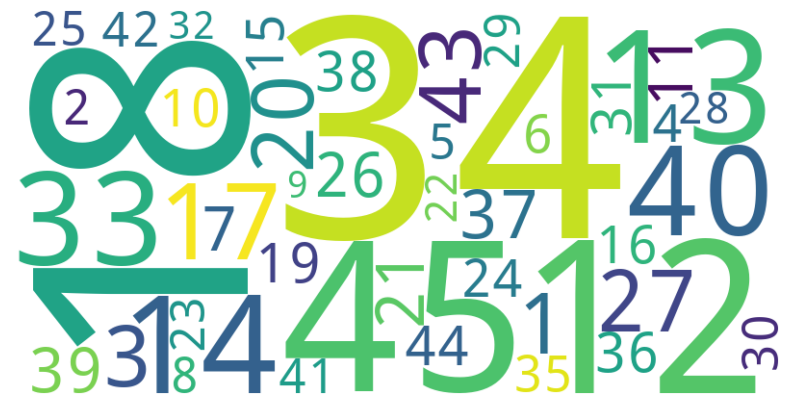

In [33]:
# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# 데이터를 정렬된 리스트로 변환
labels, values = zip(*sorted(number_counts.items()))

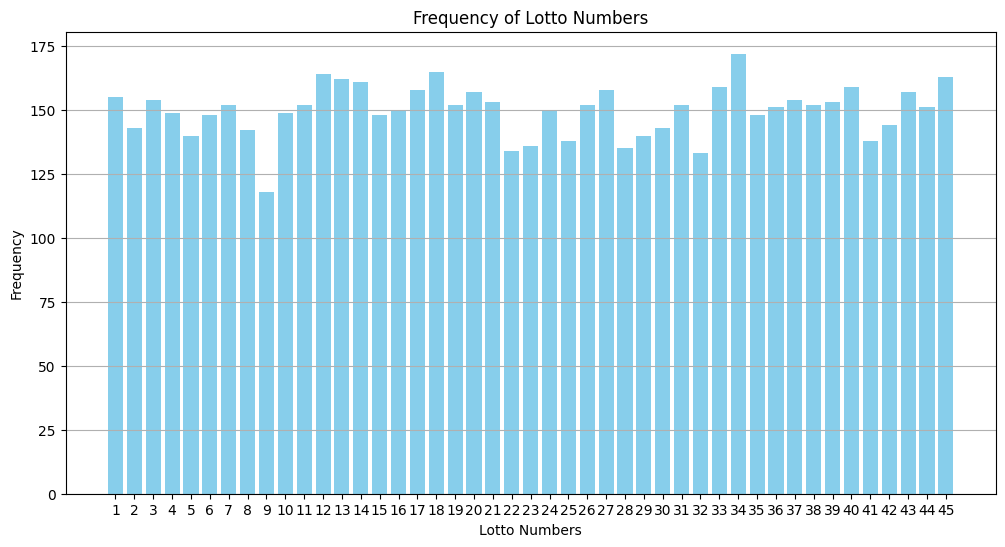

In [39]:
# 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Lotto Numbers')
plt.ylabel('Frequency')
plt.title('Frequency of Lotto Numbers')
plt.xticks(range(min(labels), max(labels)+1))
plt.grid(axis='y')

#그래프 표시
plt.show()

In [41]:
# 퍼센티지 계산

number_percentages = {key: (value / 1123) * 100 for key, value in number_counts.items()}

In [62]:
# 데이터를 정렬된 리스트로 변환
labels, values = zip(*sorted(number_percentages.items()))

In [46]:
#values

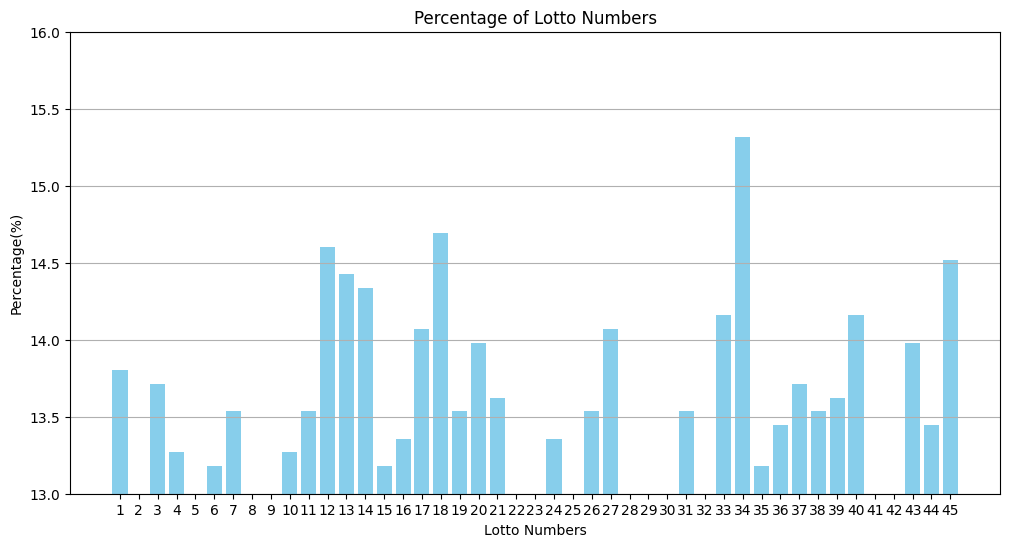

In [51]:
# 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Lotto Numbers')
plt.ylabel('Percentage(%)')
plt.title('Percentage of Lotto Numbers')
plt.xticks(range(min(labels), max(labels)+1))
plt.ylim(13, 16) # y축 범위를 10부터 16까지로 설정
plt.grid(axis='y')

# 그래프 표시
plt.show()

In [63]:
import seaborn as sns

In [65]:
# 데이터를 값(Value) 기준으로 내림차순 정렬
sorted_items = sorted(number_percentages.items(), key=lambda item:item[1], reverse=True)
labels, values = zip(*sorted_items)

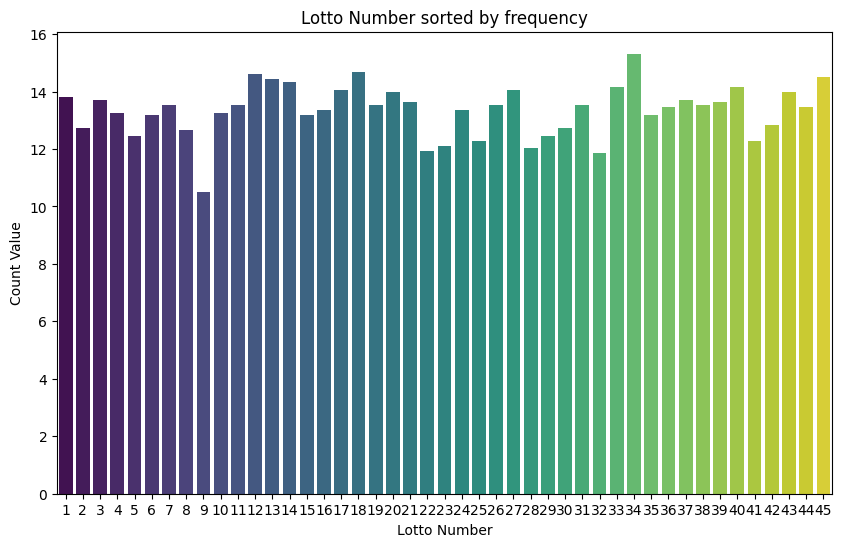

In [68]:
# seaborn 막대 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x=list(labels), y=list(values), palette='viridis')
plt.xlabel('Lotto Number')
plt.ylabel('Count Value')
plt.title('Lotto Number sorted by frequency')
plt.show()


In [69]:
from datetime import datetime
from meteostat import Point, Daily

In [70]:
# 서울 위치 설정 (위도, 경도, 고도)
location = Point(37.5665, 126.9780, 38) #서울 위치

In [71]:
# 날짜 형식 변환
lotto_data['date'] = pd.to_datetime(lotto_data['date'])

In [105]:
# 기상 데이터를 저장할 리스트
weather_data = []

In [106]:
# 각 날짜에 대한 기상 데이터 가져오기
for date in lotto_data['date']:
    start = datetime(date.year, date.month, date.day)
    end = start
    data = Daily(location, start, end)
    data = data.fetch()

    if not data.empty :
        weather_info = {
            'date':date,
            'tmin':data['tmin'].values[0] if 'tmin' in data else None,
            'tmax':data['tmax'].values[0] if 'tmax' in data else None,
            'tavg':data['tavg'].values[0] if 'tavg' in data else None,
            'wdir':data['wdir'].values[0] if 'wdir' in data else None,
            'wspd':data['wspd'].values[0] if 'wspd' in data else None,
        }
    else:
        weather_info = {
            'date':date,
            'tmin':None,
            'tmax':None,
            'tavg':None,
            'wdir':None,
            'wspd':None,
        }
    
    weather_data.append(weather_info)

# 기상 데이터를 데이터프레임으로 변환
weather_df = pd.DataFrame(weather_data)

weather_df

,date,tmin,tmax,tavg,wdir,wspd
0,2002-12-07,-0.1,6.9,5.2,342.0,11.7
1,2002-12-14,-5.1,4.5,2.0,NaN,NaN
2,2002-12-21,3.1,12.0,6.7,NaN,NaN
3,2002-12-28,-5.2,3.5,-0.1,236.0,11.3
4,2003-01-04,-14.1,-6.5,-11.4,301.0,14.1
...,...,...,...,...,...,...
1119,2024-05-18,16.0,27.1,21.0,214.0,7.5
1120,2024-05-25,19.0,24.6,21.9,99.0,7.2
1121,2024-06-01,17.0,24.6,20.6,273.0,8.8
1122,2024-06-08,19.6,23.5,20.6,256.0,6.5


In [107]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1124 non-null   datetime64[ns]
 1   tmin    1122 non-null   float64       
 2   tmax    1123 non-null   float64       
 3   tavg    1124 non-null   float64       
 4   wdir    1061 non-null   float64       
 5   wspd    1115 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 52.8 KB


In [108]:
# 습도를 제외한 데이터프레임
# weather_df = weather_df.drop(columns=['wdir'])

In [109]:
# weather_df.info()

In [110]:
# 습도를 제외한 데이터프레임
# weather_df = weather_df.drop(columns=['wdir'])

In [111]:
# 로또 데이터와 습도를 제외한 기상 데이터 병합
merge_data = pd.merge(lotto_data, weather_df, on='date')

In [112]:
merge_data

,date,num1,num2,num3,num4,num5,num6,bonus,tmin,tmax,tavg,wdir,wspd
0,2002-12-07,10,23,29,33,37,40,16,-0.1,6.9,5.2,342.0,11.7
1,2002-12-14,9,13,21,25,32,42,2,-5.1,4.5,2.0,NaN,NaN
2,2002-12-21,11,16,19,21,27,31,30,3.1,12.0,6.7,NaN,NaN
3,2002-12-28,14,27,30,31,40,42,2,-5.2,3.5,-0.1,236.0,11.3
4,2003-01-04,16,24,29,40,41,42,3,-14.1,-6.5,-11.4,301.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2024-05-18,2,19,26,31,38,41,34,16.0,27.1,21.0,214.0,7.5
1120,2024-05-25,6,24,31,32,38,44,8,19.0,24.6,21.9,99.0,7.2
1121,2024-06-01,3,6,21,30,34,35,22,17.0,24.6,20.6,273.0,8.8
1122,2024-06-08,13,19,21,24,34,35,26,19.6,23.5,20.6,256.0,6.5


In [113]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1124 non-null   datetime64[ns]
 1   num1    1124 non-null   int64         
 2   num2    1124 non-null   int64         
 3   num3    1124 non-null   int64         
 4   num4    1124 non-null   int64         
 5   num5    1124 non-null   int64         
 6   num6    1124 non-null   int64         
 7   bonus   1124 non-null   int64         
 8   tmin    1122 non-null   float64       
 9   tmax    1123 non-null   float64       
 10  tavg    1124 non-null   float64       
 11  wdir    1061 non-null   float64       
 12  wspd    1115 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 114.3 KB


In [114]:
# 'weather' 컬럼에 null 값이 있는 행 제거
cleaned_data = merge_data.dropna(subset=['wdir'])

In [115]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1061 entries, 0 to 1123
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1061 non-null   datetime64[ns]
 1   num1    1061 non-null   int64         
 2   num2    1061 non-null   int64         
 3   num3    1061 non-null   int64         
 4   num4    1061 non-null   int64         
 5   num5    1061 non-null   int64         
 6   num6    1061 non-null   int64         
 7   bonus   1061 non-null   int64         
 8   tmin    1061 non-null   float64       
 9   tmax    1061 non-null   float64       
 10  tavg    1061 non-null   float64       
 11  wdir    1061 non-null   float64       
 12  wspd    1061 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 116.0 KB


In [116]:
columns_of_interest = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'tmin', 'tmax', 'tavg', 'wdir', 'wspd']
correlation_data = cleaned_data[columns_of_interest]

In [117]:
correlation_matrix = correlation_data.corr()

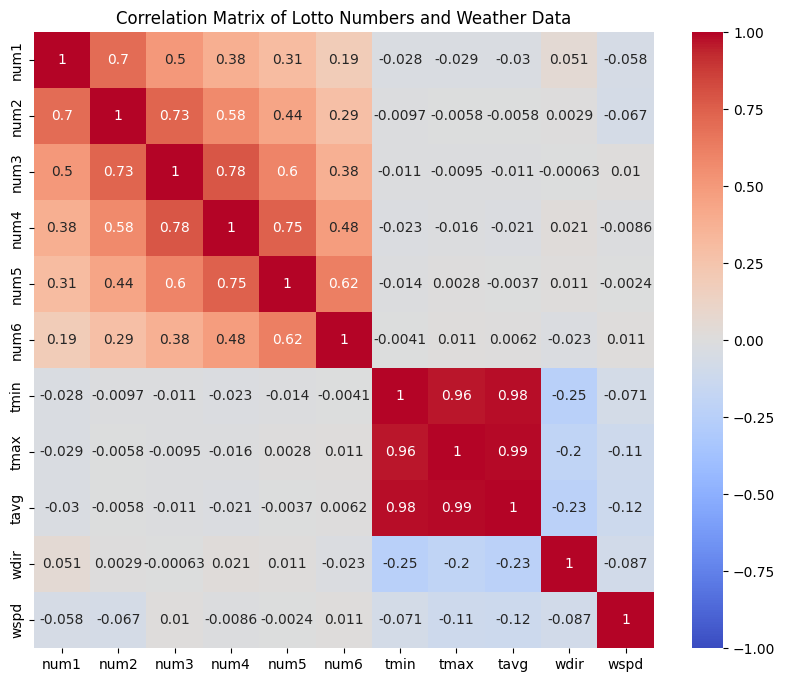

In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Lotto Numbers and Weather Data')
plt.show()

In [120]:
cleaned_data

,date,num1,num2,num3,num4,num5,num6,bonus,tmin,tmax,tavg,wdir,wspd
0,2002-12-07,10,23,29,33,37,40,16,-0.1,6.9,5.2,342.0,11.7
3,2002-12-28,14,27,30,31,40,42,2,-5.2,3.5,-0.1,236.0,11.3
4,2003-01-04,16,24,29,40,41,42,3,-14.1,-6.5,-11.4,301.0,14.1
9,2003-02-08,9,25,30,33,41,44,6,-0.1,5.9,4.0,80.0,11.1
11,2003-02-22,2,11,21,25,39,45,44,1.6,4.9,4.2,58.0,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2024-05-18,2,19,26,31,38,41,34,16.0,27.1,21.0,214.0,7.5
1120,2024-05-25,6,24,31,32,38,44,8,19.0,24.6,21.9,99.0,7.2
1121,2024-06-01,3,6,21,30,34,35,22,17.0,24.6,20.6,273.0,8.8
1122,2024-06-08,13,19,21,24,34,35,26,19.6,23.5,20.6,256.0,6.5


In [123]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1061 entries, 0 to 1123
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1061 non-null   datetime64[ns]
 1   num1    1061 non-null   int64         
 2   num2    1061 non-null   int64         
 3   num3    1061 non-null   int64         
 4   num4    1061 non-null   int64         
 5   num5    1061 non-null   int64         
 6   num6    1061 non-null   int64         
 7   bonus   1061 non-null   int64         
 8   tmin    1061 non-null   float64       
 9   tmax    1061 non-null   float64       
 10  tavg    1061 non-null   float64       
 11  wdir    1061 non-null   float64       
 12  wspd    1061 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 116.0 KB


In [121]:
# 표준화 적용
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [125]:
preparation_data = cleaned_data[['num1', 'num2', 'num3', 'num4', 'num5',  'num6', 'bonus', 'tmin', 'tmax', 'tavg', 'wdir', 'wspd']]

In [126]:
# 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(preparation_data)
standardized_data

array([[ 0.61334992,  1.43647506,  1.20809054, ..., -0.78287675,
         1.05306277,  0.57431547],
       [ 1.36243109,  2.019751  ,  1.34263279, ..., -1.28581863,
         0.03902303,  0.46989   ],
       [ 1.73697167,  1.58229404,  1.20809054, ..., -2.35812868,
         0.66083985,  1.20086828],
       ...,
       [-0.69754213, -1.04244769,  0.1317525 , ...,  0.67850154,
         0.3929803 , -0.18276918],
       [ 1.1751608 ,  0.85319911,  0.1317525 , ...,  0.67850154,
         0.23035128, -0.78321562],
       [-0.69754213, -0.75080972, -0.40641652, ...,  1.01063296,
         0.35471465, -0.46993921]])

In [127]:
standardized_df = pd.DataFrame(standardized_data)
standardized_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.613350,1.436475,1.208091,0.890264,0.604978,0.083330,-0.485775,-0.852412,-1.033776,-0.782877,1.053063,0.574315
1,1.362431,2.019751,1.342633,0.624000,1.041930,0.462783,-1.549409,-1.323935,-1.353778,-1.285819,0.039023,0.469890
2,1.736972,1.582294,1.208091,1.822186,1.187580,0.462783,-1.473436,-2.146789,-2.294961,-2.358129,0.660840,1.200868
3,0.426080,1.728113,1.342633,0.890264,1.187580,0.842236,-1.245514,-0.852412,-1.127894,-0.896750,-1.453337,0.417677
4,-0.884812,-0.313353,0.131753,-0.174790,0.896279,1.031963,1.641495,-0.695238,-1.222012,-0.877771,-1.663798,0.887592
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,-0.884812,0.853199,0.804464,0.624000,0.750629,0.273056,0.881756,0.636122,0.867414,0.716459,-0.171438,-0.522152
1057,-0.135731,1.582294,1.477175,0.757132,0.750629,0.842236,-1.093566,0.913488,0.632118,0.801865,-1.271576,-0.600471
1058,-0.697542,-1.042448,0.131753,0.490868,0.168027,-0.865304,-0.029931,0.728577,0.632118,0.678502,0.392980,-0.182769
1059,1.175161,0.853199,0.131753,-0.307922,0.168027,-0.865304,0.273964,0.968962,0.528588,0.678502,0.230351,-0.783216


In [128]:
# 정규화 적용
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(preparation_data)
normalized_data

array([[0.26470588, 0.6       , 0.7027027 , ..., 0.41356674, 0.95264624,
        0.3422619 ],
       [0.38235294, 0.71428571, 0.72972973, ..., 0.297593  , 0.65738162,
        0.33035714],
       [0.44117647, 0.62857143, 0.7027027 , ..., 0.05032823, 0.83844011,
        0.41369048],
       ...,
       [0.05882353, 0.11428571, 0.48648649, ..., 0.75054705, 0.76044568,
        0.25595238],
       [0.35294118, 0.48571429, 0.48648649, ..., 0.75054705, 0.71309192,
        0.1875    ],
       [0.05882353, 0.17142857, 0.37837838, ..., 0.82713348, 0.74930362,
        0.22321429]])

In [130]:
normalized_df = pd.DataFrame(normalized_data)
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.264706,0.600000,0.702703,0.729730,0.800000,0.814815,0.340909,0.360000,0.332589,0.413567,0.952646,0.342262
1,0.382353,0.714286,0.729730,0.675676,0.885714,0.888889,0.022727,0.246667,0.256696,0.297593,0.657382,0.330357
2,0.441176,0.628571,0.702703,0.918919,0.914286,0.888889,0.045455,0.048889,0.033482,0.050328,0.838440,0.413690
3,0.235294,0.657143,0.729730,0.729730,0.914286,0.962963,0.113636,0.360000,0.310268,0.387309,0.222841,0.324405
4,0.029412,0.257143,0.486486,0.513514,0.857143,1.000000,0.977273,0.397778,0.287946,0.391685,0.161560,0.377976
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,0.029412,0.485714,0.621622,0.675676,0.828571,0.851852,0.750000,0.717778,0.783482,0.759300,0.596100,0.217262
1057,0.147059,0.628571,0.756757,0.702703,0.828571,0.962963,0.159091,0.784444,0.727679,0.778993,0.275766,0.208333
1058,0.058824,0.114286,0.486486,0.648649,0.714286,0.629630,0.477273,0.740000,0.727679,0.750547,0.760446,0.255952
1059,0.352941,0.485714,0.486486,0.486486,0.714286,0.629630,0.568182,0.797778,0.703125,0.750547,0.713092,0.187500


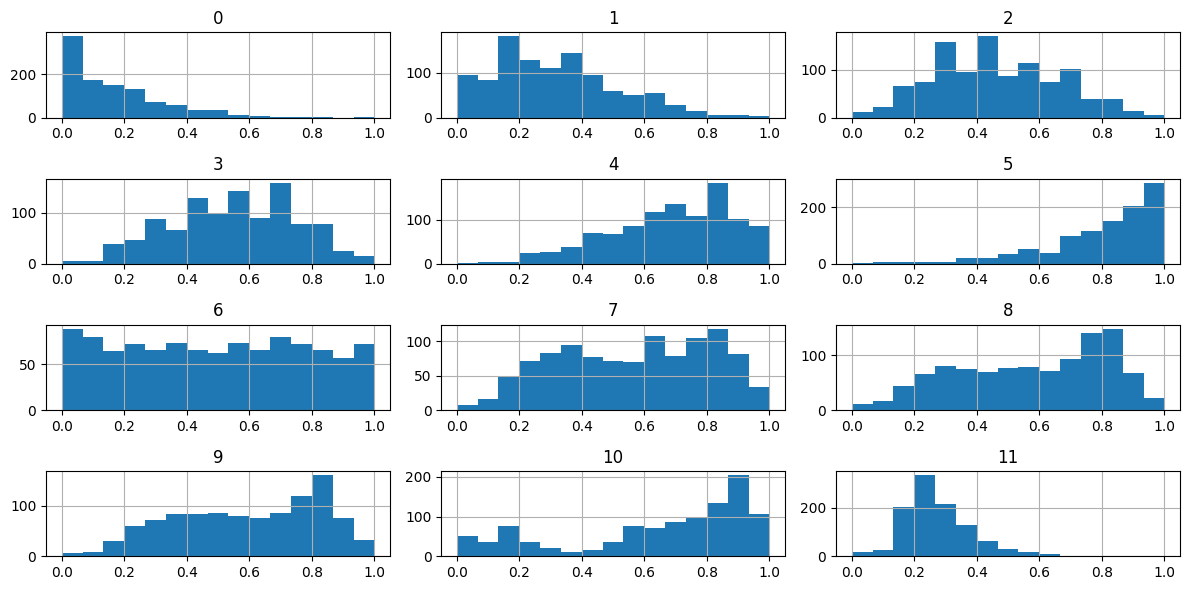

In [131]:
# 표준화된 데이터와 정규화된 데이터 비교 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 표준화된 데이터 히스토그램
standardized_df.hist(ax=ax[0], bins=15)
ax[0].set_title('Standardized Data')

# 정규화된 데이터 히스토그램
normalized_df.hist(ax=ax[1], bins=15)
ax[1].set_title('Normalized Data')

plt.tight_layout()
plt.show()

In [133]:
corr_standardized_df = standardized_df.corr()

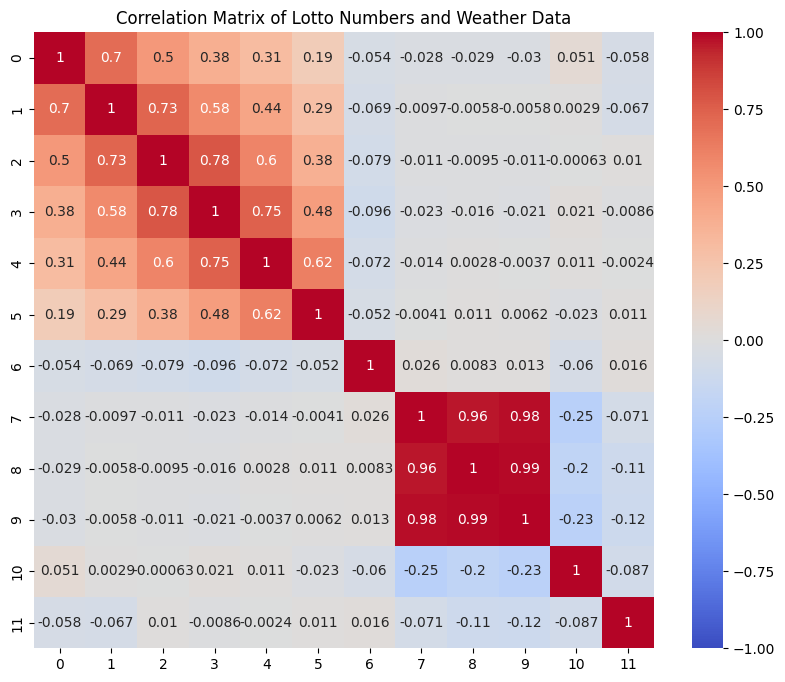

In [134]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_standardized_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Lotto Numbers and Weather Data')
plt.show()

In [135]:
corr_normalized_df = normalized_df.corr()

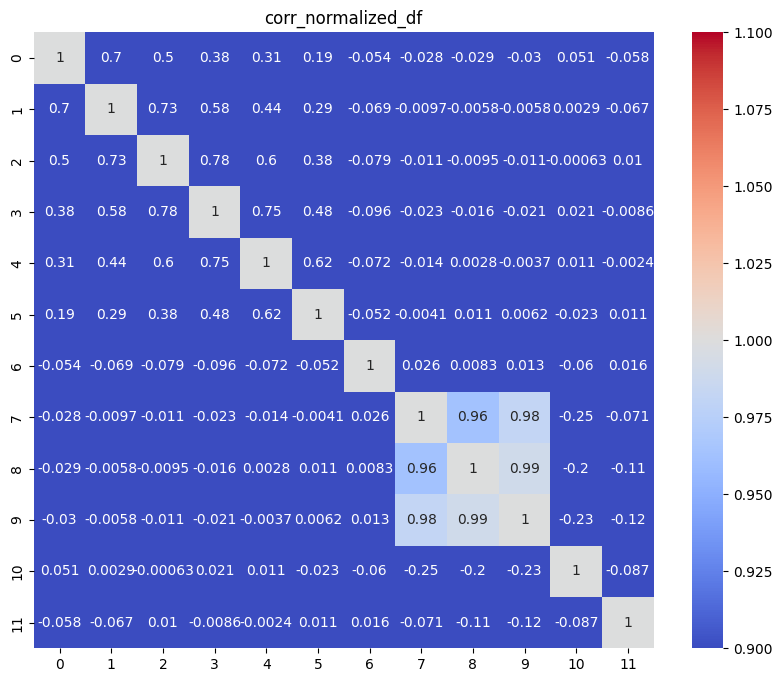

In [136]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_normalized_df, annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title("corr_normalized_df")
plt.show()

In [138]:
check_num1 = Counter(cleaned_data['num1'])
check_num1

Counter({1: 146,
         2: 118,
         3: 110,
         4: 91,
         6: 82,
         5: 80,
         7: 68,
         8: 52,
         10: 43,
         9: 38,
         12: 37,
         11: 36,
         13: 31,
         14: 27,
         16: 23,
         17: 19,
         15: 14,
         19: 10,
         21: 8,
         18: 7,
         22: 5,
         20: 5,
         26: 3,
         23: 3,
         35: 1,
         25: 1,
         29: 1,
         24: 1,
         27: 1})

In [140]:
lotto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1124 non-null   datetime64[ns]
 1   num1    1124 non-null   int64         
 2   num2    1124 non-null   int64         
 3   num3    1124 non-null   int64         
 4   num4    1124 non-null   int64         
 5   num5    1124 non-null   int64         
 6   num6    1124 non-null   int64         
 7   bonus   1124 non-null   int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 70.4 KB


In [141]:
# 필요한 컬럼 선택
lotto_columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']
correlation_lotto_data = lotto_data[lotto_columns] 

In [142]:
# 상관관계 계산
correlation_matrix_lotto = correlation_lotto_data.corr()

In [143]:
# 번호 빈도수 계산
number_counts = Counter(correlation_lotto_data['num1'].values.flatten())

In [149]:
import numpy as np

In [151]:
unique_values = np.sort(lotto_data['num1'].unique())
unique_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 35])

In [144]:
number_counts

Counter({1: 155,
         2: 122,
         3: 116,
         4: 99,
         6: 88,
         5: 88,
         7: 71,
         8: 54,
         10: 44,
         12: 40,
         9: 39,
         11: 39,
         14: 32,
         13: 32,
         16: 23,
         17: 19,
         15: 14,
         19: 12,
         21: 8,
         18: 7,
         22: 5,
         20: 5,
         26: 3,
         23: 3,
         24: 2,
         35: 1,
         25: 1,
         29: 1,
         27: 1})

In [145]:
# 빈도수 기반 확률 분포 계산
total_counts = sum(number_counts.values())
total_counts

1124

In [152]:
# 빈도수 기반 확률 분포 계산
num_probabilities = {num: count / total_counts for num, count in number_counts.items()}

In [153]:
# 상관관계가 높은 번호들 식별 (0.7 이상)
high_corr_pairs = correlation_matrix_lotto.stack().reset_index()
high_corr_pairs

,level_0,level_1,0
0,num1,num1,1.000000
1,num1,num2,0.689805
2,num1,num3,0.494720
3,num1,num4,0.375532
4,num1,num5,0.301002
5,num1,num6,0.181376
6,num2,num1,0.689805
7,num2,num2,1.000000
8,num2,num3,0.724963
9,num2,num4,0.569844
